# CS 316 : Introduction to Deep Learning
## Lab 08 : Introduction to Tensorflow & CNNs
### Dr. Abdul Samad

#Instructions

1. Please rename your notebook as Lab_8_aa1234.ipynb before the final submission. Notebooks which do not follow appropriate naming convention will not be graded.
2. The deadline to submit this lab is 11:59 PM.
3. Please submit your own work. If you have any questions, please feel free to reach out to the course instructor , RA or TA.

# Overview
In this lab, you have been given an implementation of the LeNet model for classfying the MNIST model. Your task is to perform model fine-tuning and hyperparameter tuning to improve the model's peformance.

# Setup

In [ ]:
# DO NOT EDIT
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load Fashion MNIST

In [ ]:
# DO NOT EDIT
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Preprocess the dataset

In [ ]:
# DO NOT EDIT
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert Labels to Categorical

In [ ]:
# DO NOT EDIT
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Plot sample images from the dataset

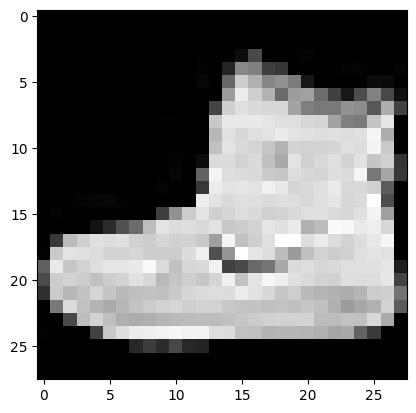

In [ ]:
# DO NOT EDIT
#Plot sample images
import matplotlib.pyplot as plt
# Select a random image from the training set
random_image = train_images[0]
plt.imshow(random_image, cmap='gray')

# Create LeNet-5 Model

In [ ]:
# DO NOT EDIT
# Define LeNet-5 model using the LeNet class
class LeNet:
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes
    self.model = self.build_model()

  # Build the model
  def build_model(self):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='sigmoid', input_shape=self.input_shape,padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='sigmoid'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='sigmoid'))
    model.add(layers.Dense(84, activation='sigmoid'))
    model.add(layers.Dense(self.num_classes, activation='linear'))
    return model
  # Compile the model
  def compile(self, optimizer, loss, metrics):
    self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  # Train the model
  def fit(self, x, y, epochs, validation_split):
    return self.model.fit(x, y, epochs=epochs, validation_split=validation_split)
  # Model summary
  def summary(self):
    return self.model.summary()
  # Evaluate the model
  def evaluate(self, x, y):
    return self.model.evaluate(x, y)
  # Save the model
  def save(self, path):
    self.model.save(path)
  # Load the model
  def load(self, path):
    self.model = tf.keras.models.load_model(path)


In [ ]:
# DO NOT EDIT
# Instantiate the model
model = LeNet(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
# Save the model
model.save('original.keras')
# Load the model
model = tf.keras.models.load_model('original.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

[0.022901741787791252, 0.8454999923706055]

# [10 Points] Task 01 - Add more CNN Layers

In this task, you have to modify the existing LeNet model to add more CNN layers. In order to do this you will create a new class `LeNetCNN` which will be based on the `LeNet` class shared earlier. After implementing the `LeNetCNN` class you have to train the model in the same way as earlier. You are also required to save the model

---



In [ ]:
#TODO: Implement LeNetCNN
class LeNetCNN:
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes
    self.model = self.build_model()

  # Build the model
  def build_model(self):
    # Write your code here
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='sigmoid', input_shape=self.input_shape,padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(8, (5, 5), activation='sigmoid'))
    model.add(layers.Conv2D(16, (5, 5), activation='sigmoid'))
    model.add(layers.Conv2D(8, (5, 5), activation='sigmoid'))

    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='sigmoid'))
    model.add(layers.Dense(84, activation='sigmoid'))
    model.add(layers.Dense(self.num_classes, activation='linear'))
    return model
  # Compile the model
  def compile(self, optimizer, loss, metrics):
    self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  # Train the model
  def fit(self, x, y, epochs, validation_split):
    return self.model.fit(x, y, epochs=epochs, validation_split=validation_split)
  # Model summary
  def summary(self):
    return self.model.summary()
  # Evaluate the model
  def evaluate(self, x, y):
    return self.model.evaluate(x, y)
  # Save the model
  def save(self, path):
    self.model.save(path)
  # Load the model
  def load(self, path):
    self.model = tf.keras.models.load_model(path)


In [ ]:
# Instantiate the model
model = LeNetCNN(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
# Save the model
model.save('original_cnn.keras')
# Load the model
model = tf.keras.models.load_model('original_cnn.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_72 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_90 (Conv2D)          (None, 10, 10, 8)         1208      
                                                                 
 conv2d_91 (Conv2D)          (None, 6, 6, 16)          3216      
                                                                 
 conv2d_92 (Conv2D)          (None, 2, 2, 8)           3208      
                                                                 
 average_pooling2d_73 (Aver  (None, 1, 1, 8)           0         
 agePooling2D)                                       

[0.034058183431625366, 0.7354000210762024]

# [10 Points] Task 02 - Add more Dense Layers

In this task, you have to modify the existing LeNet model to add more CNN layers. In order to do this you will create a new class `LeNetDense` which will be based on the `LeNet` class shared earlier. After implementing the `LeNetDense` class you have to train the model in the same way as earlier. You are also required to save the model

---



In [ ]:
#TODO: Implement LeNetDense
class LeNetDense:
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes
    self.model = self.build_model()

  # Build the model
  def build_model(self):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='sigmoid', input_shape=self.input_shape,padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='sigmoid'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='sigmoid'))
    model.add(layers.Dense(84, activation='sigmoid'))
    model.add(layers.Dense(62, activation='sigmoid'))
    model.add(layers.Dense(38, activation='sigmoid'))
    model.add(layers.Dense(self.num_classes, activation='linear'))
    return model

    return model
  # Compile the model
  def compile(self, optimizer, loss, metrics):
    self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  # Train the model
  def fit(self, x, y, epochs, validation_split):
    return self.model.fit(x, y, epochs=epochs, validation_split=validation_split)
  # Model summary
  def summary(self):
    return self.model.summary()
  # Evaluate the model
  def evaluate(self, x, y):
    return self.model.evaluate(x, y)
  # Save the model
  def save(self, path):
    self.model.save(path)
  # Load the model
  def load(self, path):
    self.model = tf.keras.models.load_model(path)


In [ ]:
# Instantiate the model
model = LeNetDense(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
# Save the model
model.save('original_dense.keras')
# Load the model
model = tf.keras.models.load_model('original_cnn.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_76 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_96 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_77 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_13 (Flatten)        (None, 400)               0         
                                                                 
 dense_41 (Dense)            (None, 120)             

[0.034058183431625366, 0.7354000210762024]

# [10 Points] Task 03 - Replace Activation function

In this task, you have to modify the existing LeNet model to replace the sigmoid activation function with ReLU activation function. In order to do this you will create a new class `LeNetAct` which will be based on the `LeNet` class shared earlier. After implementing the `LeNetAct` class you have to train the model in the same way as earlier. You are also required to save the model

---



In [ ]:
#TODO: Implement LeNetAct
class LeNetAct:
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes
    self.model = self.build_model()

  # Build the model
  def build_model(self):
    # Write your code here
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=self.input_shape,padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(self.num_classes, activation='linear'))
    return model
  # Compile the model
  def compile(self, optimizer, loss, metrics):
    self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  # Train the model
  def fit(self, x, y, epochs, validation_split):
    return self.model.fit(x, y, epochs=epochs, validation_split=validation_split)
  # Model summary
  def summary(self):
    return self.model.summary()
  # Evaluate the model
  def evaluate(self, x, y):
    return self.model.evaluate(x, y)
  # Save the model
  def save(self, path):
    self.model.save(path)
  # Load the model
  def load(self, path):
    self.model = tf.keras.models.load_model(path)


In [ ]:
# Instantiate the model
model = LeNetAct(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
# Save the model
model.save('original_act.keras')
# Load the model
model = tf.keras.models.load_model('original_act.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_82 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_102 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_83 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_16 (Flatten)        (None, 400)               0         
                                                                 
 dense_52 (Dense)            (None, 120)             

[0.015787439420819283, 0.8949999809265137]

# [10 Points] Task 04 - Replace Loss function

In this task, you have to modify the existing LeNet model by using the cross entropy loss instead of mean squared error. You will also have to replace the linear activation function with sigmoid activation function in the last layer. In order to do this you will create a new class `LeNetLoss` which will be based on the `LeNet` class shared earlier. After implementing the `LeNetLoss` class you have to train the model in the same way as earlier. You are also required to save the model

---



In [ ]:
#TODO: Implement LeNetLoss
class LeNetLoss:
  def __init__(self, input_shape, num_classes):
    self.input_shape = input_shape
    self.num_classes = num_classes
    self.model = self.build_model()

  # Build the model
  def build_model(self):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='sigmoid', input_shape=self.input_shape,padding='same'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='sigmoid'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='sigmoid'))
    model.add(layers.Dense(84, activation='sigmoid'))
    model.add(layers.Dense(self.num_classes, activation='sigmoid'))

    return model
  # Compile the model
  def compile(self, optimizer, loss, metrics):
    self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  # Train the model
  def fit(self, x, y, epochs, validation_split):
    return self.model.fit(x, y, epochs=epochs, validation_split=validation_split)
  # Model summary
  def summary(self):
    return self.model.summary()
  # Evaluate the model
  def evaluate(self, x, y):
    return self.model.evaluate(x, y)
  # Save the model
  def save(self, path):
    self.model.save(path)
  # Load the model
  def load(self, path):
    self.model = tf.keras.models.load_model(path)


In [ ]:
# Instantiate the model
model = LeNetLoss(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
# Save the model
model.save('original_loss.keras')
# Load the model
model = tf.keras.models.load_model('original_loss.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_86 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_106 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_87 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_18 (Flatten)        (None, 400)               0         
                                                                 
 dense_58 (Dense)            (None, 120)             

[0.47350162267684937, 0.8201000094413757]

#[10 Points] Task 05 - Use SGD optimizer

In this task instead of modifying the LeNet model, you will be training the model using SGD instead of Adam.

In [ ]:
# Instantiate the
model = LeNet(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model using SGD
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
# Save the model
model.save('original_sgd.keras')
# Load the model
model = tf.keras.models.load_model('original_sgd.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_88 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_108 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_89 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_19 (Flatten)        (None, 400)               0         
                                                                 
 dense_61 (Dense)            (None, 120)             

[4.835432052612305, 0.10000000149011612]

# [10 Points] Task 06 - Vary the number of Epochs


In this task instead of modifying the LeNet model, you will be fine tuing the number of epochs.

In [ ]:
# Instantiate the model
model = LeNet(input_shape=(28, 28, 1), num_classes=10)
# Summarize the model
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Modify the number of epochs
model.fit(train_images, train_labels, epochs=50, validation_split=0.1)
# Save the model
model.save('original_epoch.keras')
# Load the model
model = tf.keras.models.load_model('original_epoch.keras')
# Evaluate the model
model.evaluate(test_images, test_labels)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_90 (Aver  (None, 14, 14, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_110 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_91 (Aver  (None, 5, 5, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_20 (Flatten)        (None, 400)               0         
                                                                 
 dense_64 (Dense)            (None, 120)             

[0.01469764206558466, 0.9027000069618225]

313/313 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9027


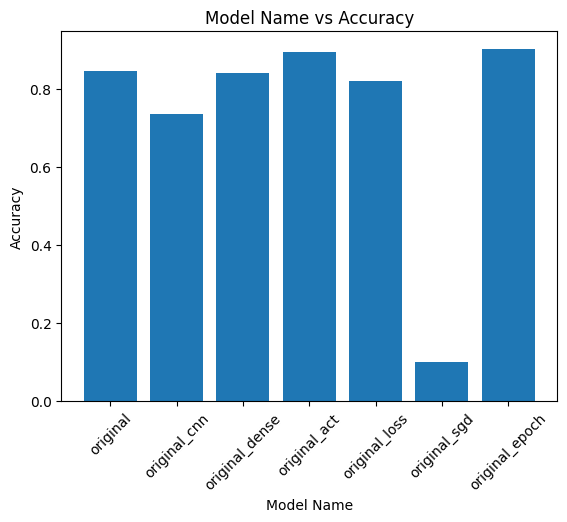

In [ ]:
model_files = [
    'original.keras',
    'original_cnn.keras',
    'original_dense.keras',
    'original_act.keras',
    'original_loss.keras',
    'original_sgd.keras',
    'original_epoch.keras'
]

names = []
paramaters = []
accuracies = []
losses = []

for i in model_files:
    model = tf.keras.models.load_model(i)
    model_name = i.split('.')[0]
    num_trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    loss, accuracy = model.evaluate(test_images, test_labels)
    names.append(model_name)
    paramaters.append(num_trainable_params)
    accuracies.append(accuracy)
    losses.append(loss)

import matplotlib.pyplot as plt

plt.bar(names, accuracies)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Model Name vs Accuracy')

# Optionally, rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

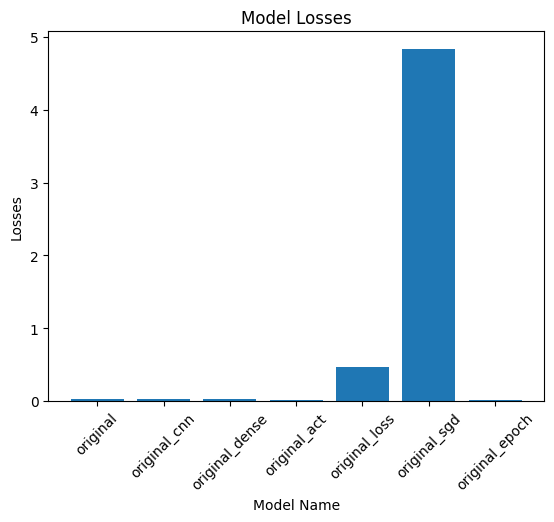

In [ ]:
plt.bar(names, losses)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Losses')
plt.title('Model Losses')

# Optionally, rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

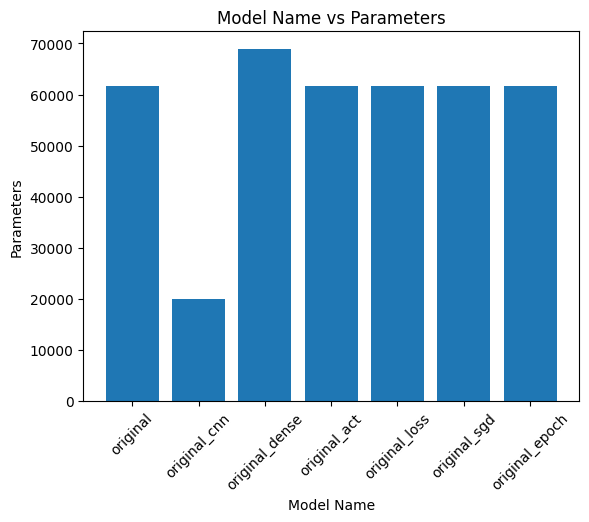

In [ ]:
plt.bar(names, paramaters)

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Parameters')
plt.title('Model Name vs Parameters')

# Optionally, rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

###Intrepretation of the Above Result

- Given different model implementations, in terms of accuracy, we can see that increasing the epochs significantly increased the model's accuracy. When we change the optimizer from Adam to Stochastic Gradient Descent, the model accuracy decreases alot.
- Model Losses are very high with stochastic gradient descent. In verifies our results from the Model vs Accuracy bar chart, where the model with SGD had minimum accuracy, and a very high losses.
- If we look at the parameters, increasing the cnn layers in the model decreases the parameters more than halve, while making other changes to model does not have any effect.
